# Imports

In [3]:
import pandas as pd
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Processing

In [4]:
def get_paths(id, signal):
    group = glob.glob(f"../data/D1_2/{id}/**/{signal}.csv", recursive=True)
    #return [path for path in group if "round_1" in path]
    return group

In [5]:
get_paths("ID_1", "HR")

['../data/D1_2/ID_1\\round_1\\phase1\\HR.csv',
 '../data/D1_2/ID_1\\round_1\\phase2\\HR.csv',
 '../data/D1_2/ID_1\\round_1\\phase3\\HR.csv',
 '../data/D1_2/ID_1\\round_2\\phase1\\HR.csv',
 '../data/D1_2/ID_1\\round_2\\phase2\\HR.csv',
 '../data/D1_2/ID_1\\round_2\\phase3\\HR.csv',
 '../data/D1_2/ID_1\\round_3\\phase1\\HR.csv',
 '../data/D1_2/ID_1\\round_3\\phase2\\HR.csv',
 '../data/D1_2/ID_1\\round_3\\phase3\\HR.csv',
 '../data/D1_2/ID_1\\round_4\\phase1\\HR.csv',
 '../data/D1_2/ID_1\\round_4\\phase2\\HR.csv',
 '../data/D1_2/ID_1\\round_4\\phase3\\HR.csv']

In [29]:
def create_df(group, id, signal):
    paths = get_paths(id, signal)
    dfs_phases = []
    for path in paths:
        df = pd.read_csv(path).drop(columns="Unnamed: 0")
        df['phase'] = path.split('\\')[-2]
        dfs_phases.append(df)
    
    df = pd.concat(dfs_phases, axis=0)
    df1 = df.pivot(index='time', columns='phase', values=signal)
    return df1

In [30]:
def display_phases(df):
    display("Phase 1", df[df['phase2'].isnull() & df['phase3'].isnull()])
    display("Phase 2", df[df['phase1'].isnull() & df['phase3'].isnull()])
    display("Phase 3", df[df['phase1'].isnull() & df['phase2'].isnull()])

### Plotting

In [11]:
colors = ['blue', 'red', 'green']  # colors for each phase

### HR

<AxesSubplot:xlabel='time'>

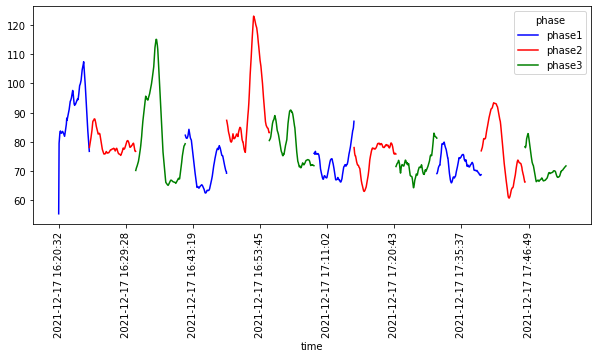

In [12]:
df1 = create_df(id = "ID_2", signal = "HR")
df1.plot(color=colors, figsize=(10,4), rot=90)

### BVP

<AxesSubplot:xlabel='time'>

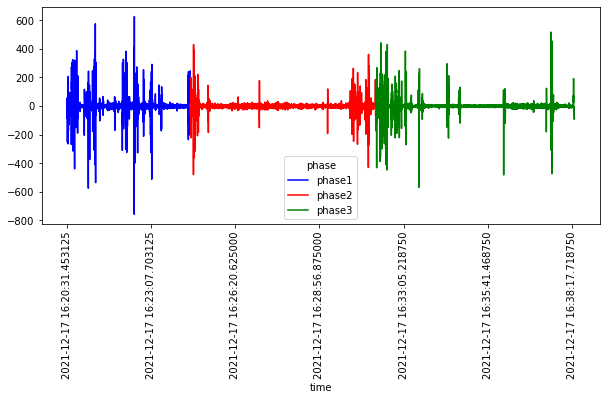

In [45]:
df1 = create_df(id = "ID_2", signal = "BVP")
df1.plot(color=colors, figsize=(10,4), rot=90)

### EDA

In [35]:
# create a list to store the data frames for each ID
dfs = []
ids = ["ID_1", "ID_2", "ID_3", "ID_4", "ID_5", "ID_6", "ID_7", "ID_8"]
phase_colors = ["red", "blue", "green", "purple", "orange", "brown", "pink", "gray", "olive"]
signal = "EDA"

def plot_signal(signal):
    for id in ids:
        # create a data frame for the current ID
        df = create_df(id, signal)
        df.index = pd.to_datetime(df.index)
        dfs.append(df)

    # create plots grid
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
    x_ticks = pd.date_range(start=dfs[0].index.min(), end=dfs[0].index.max(), periods=10)
    x_ticklabels = [str(t) for t in x_ticks]

    for i, ax in enumerate(axs.flatten()):
        df = dfs[i]
        grouped = df.groupby(axis=1, level=0)
        for j, (phase, phase_df) in enumerate(grouped):
            color = phase_colors[j % len(phase_colors)]
            phase_df.plot(ax=ax, color=color, rot=90, label=phase)
        ax.set_title(ids[i])
        ax.set_xlabel("Time")
        ax.set_ylabel(signal)
        ax.legend()
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticklabels)

    plt.tight_layout()
    plt.show()

In [36]:
plot_signal(signal="HR")

TypeError: create_df() missing 1 required positional argument: 'signal'

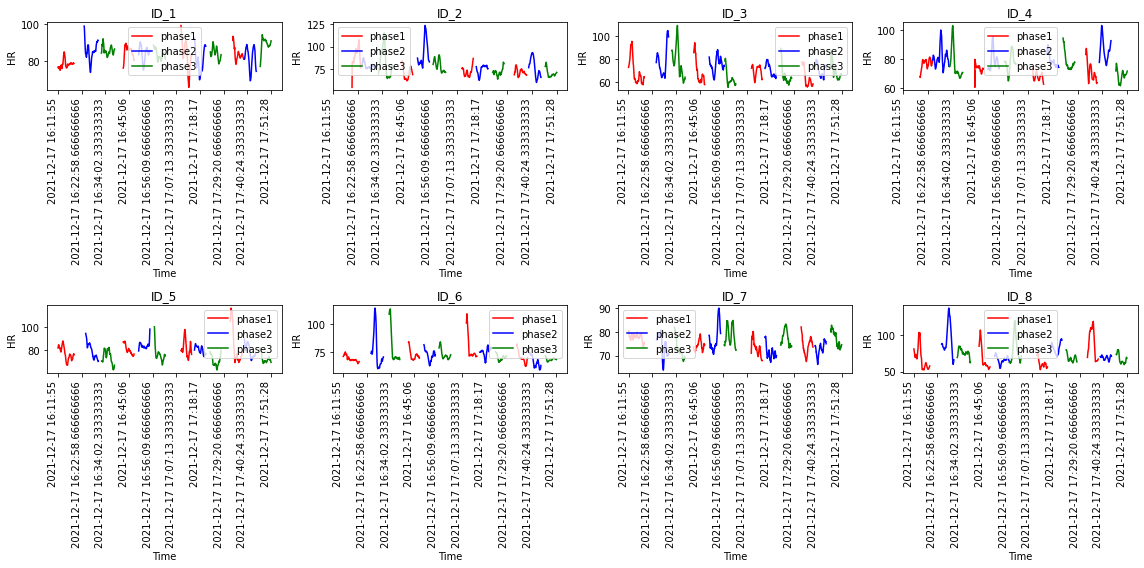

In [14]:
plot_signal("HR")

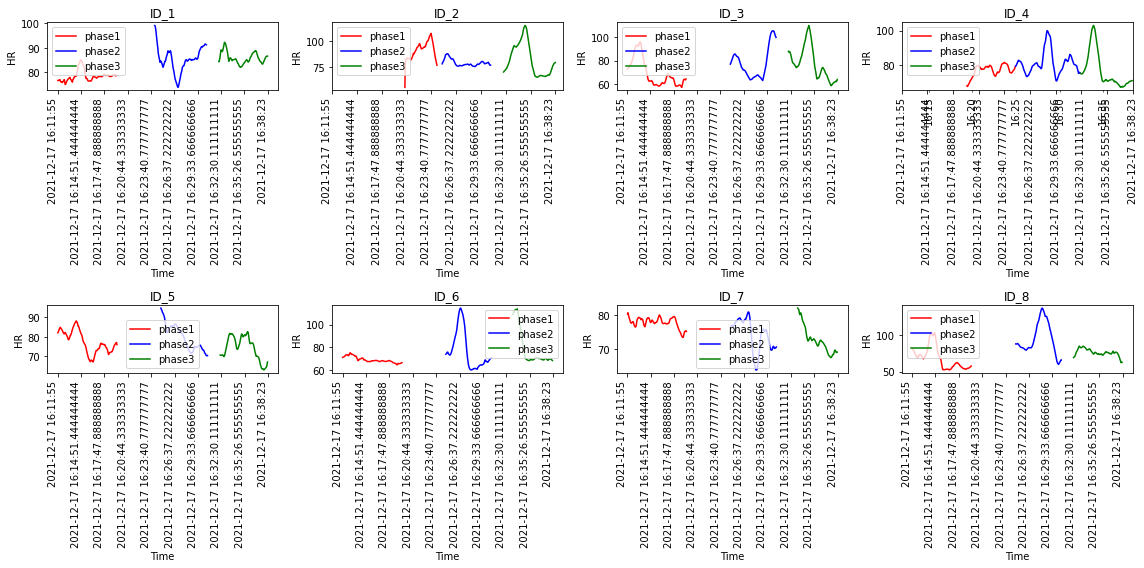

In [97]:
plot_signal("HR")

In [95]:
df1 = create_df(id = "ID_4", signal = "BVP")
display_phases(df1)

'Phase 1'

phase,phase1,phase2,phase3
time,,,
2021-12-17 16:19:22.390625,10.56,NaN,NaN
2021-12-17 16:19:22.406250,14.44,NaN,NaN
2021-12-17 16:19:22.421875,21.26,NaN,NaN
2021-12-17 16:19:22.437500,30.66,NaN,NaN
2021-12-17 16:19:22.453125,41.06,NaN,NaN
...,...,...,...
2021-12-17 16:24:56.343750,-30.39,NaN,NaN
2021-12-17 16:24:56.359375,-34.70,NaN,NaN
2021-12-17 16:24:56.375000,-37.64,NaN,NaN


'Phase 2'

phase,phase1,phase2,phase3
time,,,
2021-12-17 16:24:56.421875,NaN,-17.06,NaN
2021-12-17 16:24:56.437500,NaN,-2.20,NaN
2021-12-17 16:24:56.453125,NaN,10.12,NaN
2021-12-17 16:24:56.468750,NaN,15.23,NaN
2021-12-17 16:24:56.484375,NaN,10.89,NaN
...,...,...,...
2021-12-17 16:32:22.203125,NaN,11.78,NaN
2021-12-17 16:32:22.218750,NaN,6.22,NaN
2021-12-17 16:32:22.234375,NaN,-1.41,NaN


'Phase 3'

phase,phase1,phase2,phase3
time,,,
2021-12-17 16:32:22.281250,NaN,NaN,-42.62
2021-12-17 16:32:22.296875,NaN,NaN,-59.94
2021-12-17 16:32:22.312500,NaN,NaN,-76.43
2021-12-17 16:32:22.328125,NaN,NaN,-90.63
2021-12-17 16:32:22.343750,NaN,NaN,-101.51
...,...,...,...
2021-12-17 16:38:20.375000,NaN,NaN,8.88
2021-12-17 16:38:20.390625,NaN,NaN,8.40
2021-12-17 16:38:20.406250,NaN,NaN,8.06


## BVP

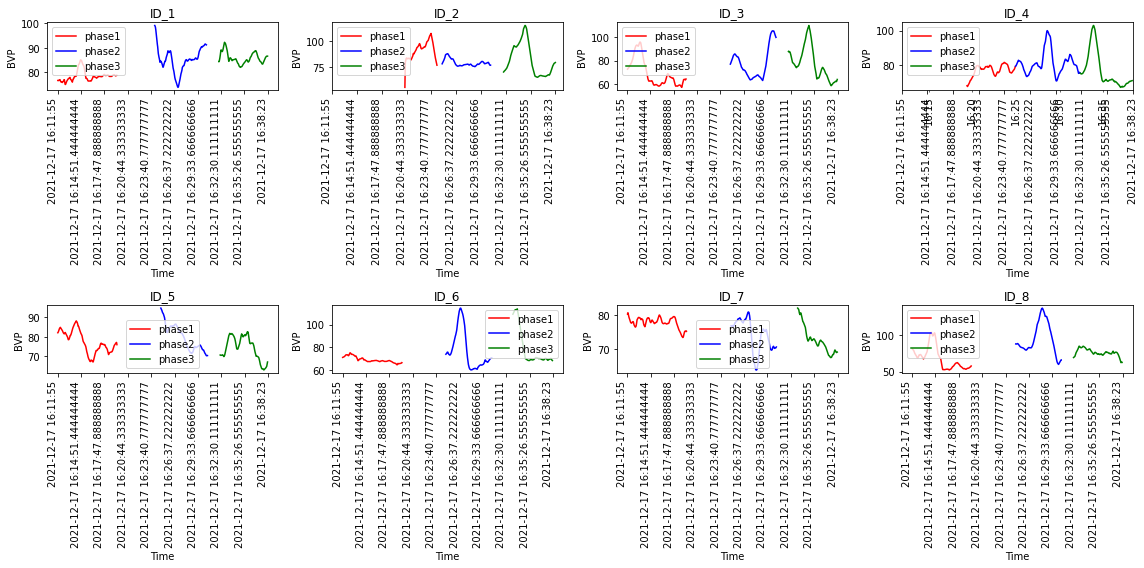

In [98]:
plot_signal("BVP")

## EDA

### Group

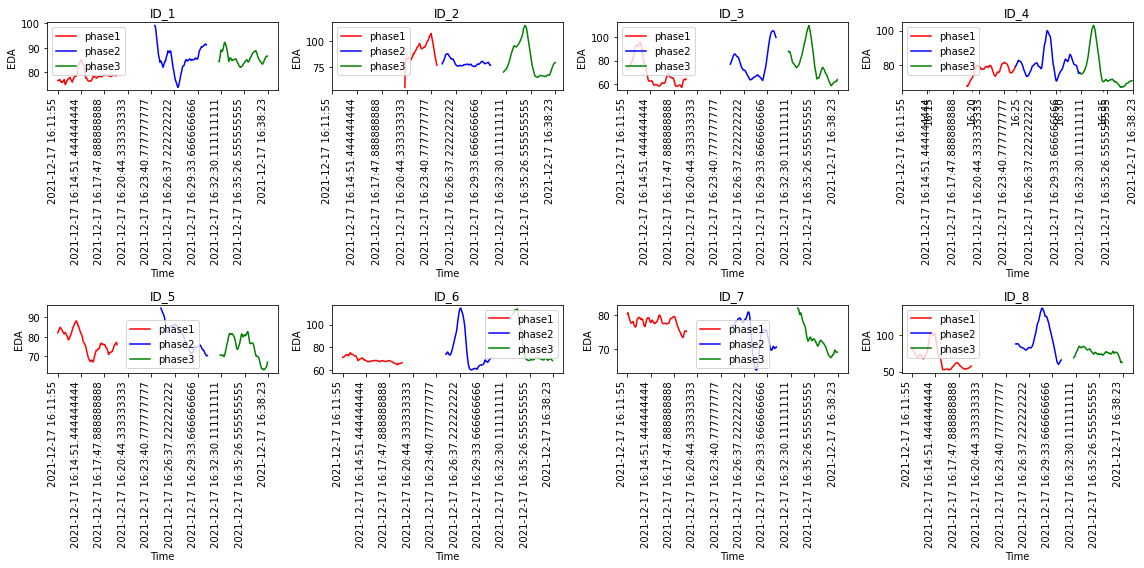

In [99]:
plot_signal("EDA")

<AxesSubplot:xlabel='time'>

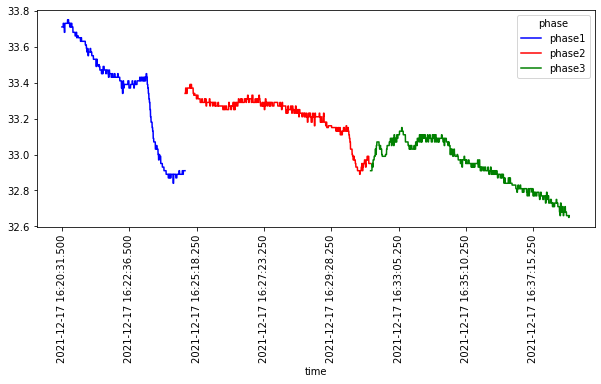

In [27]:
df1 = create_df(id = "ID_2", signal = "TEMP")
df1.plot(color=colors, figsize=(10,4), rot=90)

## Obsolete

In [ ]:
dfs_phases = []
for path in round1_paths:
    df = pd.read_csv(path).drop(columns="Unnamed: 0")
    df['phase'] = path.split('\\')[-2]
    dfs_phases.append(df)

df = pd.concat(dfs_phases, axis=0)
df

In [7]:
id = "ID_1"
signal = "BVP"
group1 = glob.glob(f"../data/D1_1/{id}/**/{signal}.csv", recursive=True)
round1_paths = [path for path in group1 if "round_1" in path]
round1_paths

# for path in round1_paths:
#     match = re.search(r'\\(phase2)\\', path)
#     if match:
#         phase2_path = path[:match.start(1)] + "phase2\\" + path[match.end(1):]
#     match = re.search(r'\\(phase1)\\', path)
#     if match:
#         phase2_path = path[:match.start(1)] + "phase1\\" + path[match.end(1):]

['../data/D1_1/ID_1\\round_1\\phase1\\BVP.csv',
 '../data/D1_1/ID_1\\round_1\\phase2\\BVP.csv',
 '../data/D1_1/ID_1\\round_1\\phase3\\BVP.csv']